<a href="https://colab.research.google.com/github/amumorde/Play_store_App_review_analysis/blob/main/Copy_of_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
# Importing modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
path1 = "/MyDrive/Colab Notebooks/Play Store App Review Analysis/Play Store Data.csv"
playstore_Df = pd.read_csv("/content/drive"+path1)

In [4]:
path2 = "/MyDrive/Colab Notebooks/Play Store App Review Analysis/User Reviews.csv"
reviews_Df = pd.read_csv("/content/drive"+path2)

In [5]:
playstore_Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
reviews_Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [7]:
# Dropping Repeated Apps from Playstore Dataframe
playstore_Df.drop_duplicates(subset="App",keep="last",inplace=True)
playstore_Df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9660 non-null   object 
 1   Category        9660 non-null   object 
 2   Rating          8197 non-null   float64
 3   Reviews         9660 non-null   object 
 4   Size            9660 non-null   object 
 5   Installs        9660 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9660 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9660 non-null   object 
 10  Last Updated    9660 non-null   object 
 11  Current Ver     9652 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


In [8]:
playstore_Df.describe()

,Rating
count,8197.000000
mean,4.175027
std,0.560685
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [9]:
# Maximum Rated app is an outlier
playstore_Df.loc[playstore_Df["Rating"].idxmax(),:]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                               19.0
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

## Rating for Apps cannot be greater than 5.0

In [10]:
#Removing app with rating as 19 from the dataframe
playstore_Df = playstore_Df[playstore_Df["Rating"]!=19]
reviews_Df = reviews_Df[reviews_Df['App']!="Life Made WI-Fi Touchscreen Photo Frame"]

In [11]:
#Head of the playstore dataframe
playstore_Df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [12]:
#Head of the reviews dataframe
reviews_Df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


# tail of reviews dataframe for last 5 rows

In [43]:
reviews_Df.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000
64230,Housing-Real Estate & Property,"Useless app, I searched flats kondapur, Hydera...",Negative,-0.316667,0.400000


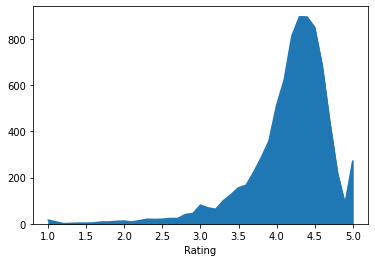

In [13]:
playstore_Df.groupby("Rating")['App'].count().plot(kind = "area")

Median imputation in which the missing values are replaced with the median value of the entire feature column.When the data is skewed, it is good to consider using the median value for replacing the missing values. 

In [14]:
playstore_Df["Rating"].median()

4.3

In [15]:
# Replacing NAN Rated Apps with median values
playstore_Df[playstore_Df["Rating"].isna()] = playstore_Df["Rating"].median()


In [16]:
playstore_Df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          9659 non-null   float64
 3   Reviews         9659 non-null   object 
 4   Size            9659 non-null   object 
 5   Installs        9659 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9655 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


In [17]:
#Converting Dtype of Installs to float
playstore_Df['Installs']=playstore_Df['Installs'].apply(lambda x: str(x).replace("+",'') if "+" in str(x) else x)
playstore_Df['Installs']=playstore_Df['Installs'].apply(lambda x: str(x).replace(",",'')if "," in str(x) else x)
playstore_Df['Installs'] = playstore_Df['Installs'].apply(lambda x : float(x))

In [18]:
#Converting Dtype of Size to float
playstore_Df['Size']=playstore_Df['Size'].apply(lambda x: str(x).replace("M",'')if "M" in str(x) else x)
playstore_Df['Size']=playstore_Df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str( x) else x)
playstore_Df['Size'] = playstore_Df['Size'].replace("Varies with device",np.nan)
playstore_Df['Size'] = playstore_Df['Size'].apply(lambda x : float(x))

In [19]:
# Converting Dtype of Reviews to float
playstore_Df["Reviews"] = playstore_Df["Reviews"].apply(lambda x : float(x))

In [20]:
# Converting Dtype of Price to float
playstore_Df['Price']=playstore_Df['Price'].apply(lambda x: str(x).replace("$",'')if "$" in str(x) else x)
playstore_Df["Price"] = playstore_Df["Price"].apply(lambda x : float(x))

In [21]:
# Converting Dtype of Last Updated to DateTime
playstore_Df["Last Updated"] = pd.to_datetime(playstore_Df["Last Updated"]).dt.date

In [22]:
playstore_Df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          9659 non-null   float64
 3   Reviews         9659 non-null   float64
 4   Size            8490 non-null   float64
 5   Installs        9659 non-null   float64
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9655 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(5), object(8)
memory usage: 1.0+ MB


In [23]:
playstore_Df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,5.6,50000.0,Free,0.0,Everyone,Art & Design,2017-03-26,1.0,2.3 and up


In [42]:
playstore_Df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53.0,5000.0,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6,100.0,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up
10838,4.3,4.3,4.3,4.3,4.3,4.3,4.3,4.3,4.3,4.3,1970-01-01,4.3,4.3
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,NaN,1000.0,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307.0,19.0,10000000.0,Free,0.0,Everyone,Lifestyle,2018-07-25,Varies with device,Varies with device


Data Analysis Based on App Category

Text(0.5, 1.0, 'Installations based on Category')

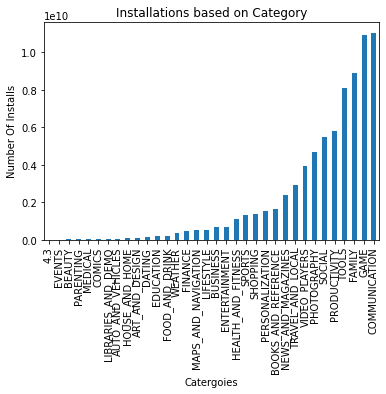

In [24]:
#Installations based on Category 
playstore_Df.groupby("Category")["Installs"].sum().sort_values().plot(kind = "bar")
plt.xlabel("Catergoies")
plt.ylabel("Number Of Installs")
plt.title("Installations based on Category")

Text(0.5, 1.0, 'Number of Apps based on Category')

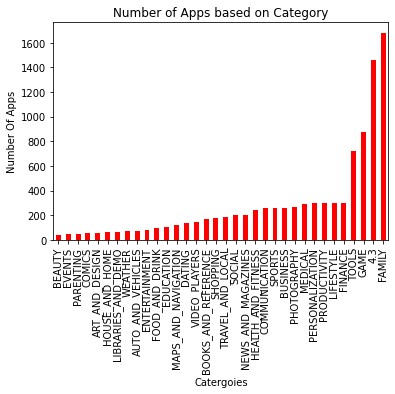

In [25]:
# Apps based on Category
playstore_Df.groupby("Category")["App"].count().sort_values().plot(kind = "bar", color ="red")
plt.xlabel("Catergoies")
plt.ylabel("Number Of Apps")
plt.title("Number of Apps based on Category")

Analyse Data Based on Type of the App

Text(0.5, 1.0, 'Number of paid and free Apps')

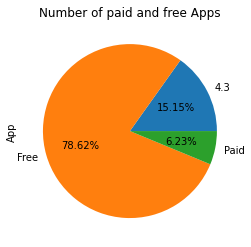

In [26]:
# Obtain number of apps based on its type
playstore_Df.groupby("Type")["App"].count().plot(kind = "pie",autopct="%.2f%%")
plt.title("Number of paid and free Apps")

Text(0.5, 1.0, 'Installs for free and paid apps')

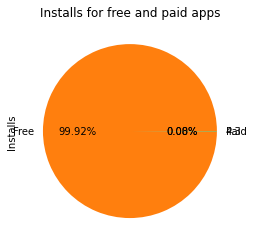

In [27]:
playstore_Df.groupby(['Type'])['Installs'].sum().plot(kind = 'pie',autopct="%.2f%%")
plt.title("Installs for free and paid apps")

Text(0.5, 1.0, 'Average Rating for Free and Paid Apps')

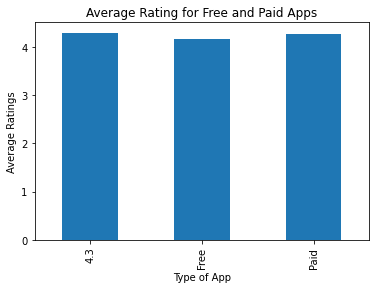

In [28]:
playstore_Df.groupby(['Type'])["Rating"].mean().plot(kind = "bar")
plt.xlabel("Type of App")
plt.ylabel("Average Ratings")
plt.title("Average Rating for Free and Paid Apps")

Top 10 highst installed apps

In [29]:
playstore_Df.groupby("App")["Installs"].sum().sort_values(ascending = False).head(10)

App
WhatsApp Messenger                          1.000000e+09
Google                                      1.000000e+09
Subway Surfers                              1.000000e+09
Google Chrome: Fast & Secure                1.000000e+09
Google Drive                                1.000000e+09
Google Street View                          1.000000e+09
Google News                                 1.000000e+09
Messenger – Text and Video Chat for Free    1.000000e+09
Google+                                     1.000000e+09
Google Play Games                           1.000000e+09
Name: Installs, dtype: float64

Text(0.5, 1.0, 'Number of Installs for Different Content Ratings')

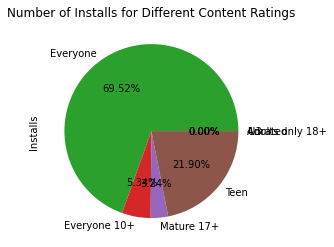

In [30]:
playstore_Df.groupby("Content Rating")["Installs"].sum().plot(kind="pie",autopct="%.2f%%")
plt.title("Number of Installs for Different Content Ratings")

Text(0.5, 1.0, 'Number of Apps for Different Content Ratings')

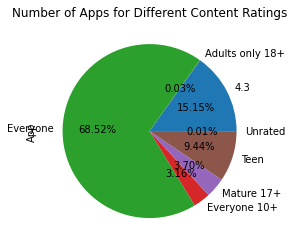

In [31]:
playstore_Df.groupby("Content Rating")["App"].count().plot(kind="pie",autopct="%.2f%%")
plt.title("Number of Apps for Different Content Ratings")

Number of installs based on size of the apps

Text(0.5, 1.0, 'Number of installs for various sizes of apps')

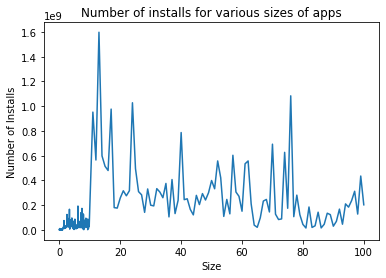

In [32]:
playstore_Df.groupby("Size")["Installs"].sum().plot()
plt.xlabel("Size")
plt.ylabel("Number of Installs")
plt.title("Number of installs for various sizes of apps")

View Number of Installs based on last update 

Text(0.5, 1.0, 'Number of Installs based on last update')

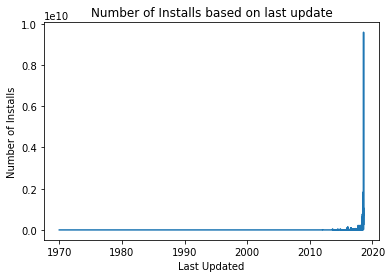

In [33]:
playstore_Df.groupby("Last Updated")["Installs"].sum().plot()
plt.xlabel("Last Updated")
plt.ylabel("Number of Installs")
plt.title("Number of Installs based on last update")

In [34]:
# Remove all NAN Translated Reviews
reviews_Df = reviews_Df[~reviews_Df["Translated_Review"].isna()]



In [35]:
# getiing subjective reviews for the apps
subjective = reviews_Df[reviews_Df['Sentiment_Subjectivity']>0.5]
subjective

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
6,10 Best Foods for You,Amazing,Positive,0.600000,0.900000
10,10 Best Foods for You,good you.,Positive,0.700000,0.600000
12,10 Best Foods for You,"Thank you! Great app!! Add arthritis, eyes, im...",Positive,0.750000,0.875000
...,...,...,...,...,...
64209,Housing-Real Estate & Property,Awesome app.. But prices date? Awesome app. Gi...,Positive,0.509375,0.511458
64215,Housing-Real Estate & Property,Horrible app. I wanted list property get aroun...,Negative,-0.528571,0.717262
64217,Housing-Real Estate & Property,"I able set range 1cr, scroll space 0-1cr range...",Positive,0.233333,0.550000
64220,Housing-Real Estate & Property,"No response support team. After I login, unabl...",Negative,-0.377778,0.533333


In [36]:
# Number of subjective Reviews per app
subjective.groupby("App")["Translated_Review"].count().sort_values(ascending = False)

App
Angry Birds Classic                                  159
Bowmasters                                           156
Calorie Counter - MyFitnessPal                       136
Helix Jump                                           120
CBS Sports App - Scores, News, Stats & Watch Live    115
                                                    ... 
Dashlane Free Password Manager                         1
Bed Time Fan - White Noise Sleep Sounds                1
DEER HUNTER 2018                                       1
Beauty Makeup Snappy Collage Photo Editor - Lidow      1
Draw In                                                1
Name: Translated_Review, Length: 846, dtype: int64

In [37]:
# getiing objective reviews for the apps
objective = reviews_Df[reviews_Df['Sentiment_Subjectivity']<=0.5]
objective

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
8,10 Best Foods for You,"Looking forward app,",Neutral,0.000000,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.000000,0.000000
...,...,...,...,...,...
64221,Housing-Real Estate & Property,Everything old stuff neither clear sold proper...,Positive,0.021591,0.259470
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000


In [38]:
# Number of objective Reviews per app
objective.groupby("App")["Translated_Review"].count().sort_values(ascending = False)

App
Bowmasters                        156
Helix Jump                        153
Candy Crush Saga                  144
Duolingo: Learn Languages Free    138
Garena Free Fire                  124
                                 ... 
Amazon Prime Video                  1
DashClock Widget                    1
Anger of stick 5 : zombie           1
Apartment Decorating Ideas          1
CBS News                            1
Name: Translated_Review, Length: 843, dtype: int64

In [39]:
# Getting the total number of translated reviews and mean sentiment values for the apps given
reviews_app = reviews_Df.groupby('App').agg({'Translated_Review':"count", 'Sentiment_Polarity':'mean', 'Sentiment_Subjectivity':'mean'}).sort_values(by="Translated_Review",ascending = False)
reviews_app

,Translated_Review,Sentiment_Polarity,Sentiment_Subjectivity
App,,,
Bowmasters,312,0.061415,0.500548
Helix Jump,273,0.099665,0.487221
Angry Birds Classic,273,-0.007537,0.534886
Calorie Counter - MyFitnessPal,254,0.216523,0.474814
Duolingo: Learn Languages Free,240,0.200408,0.470215
...,...,...,...
Draw a Stickman: EPIC 2,1,0.100000,0.541667
HD Camera,1,0.000000,0.000000
Draw In,1,-0.134167,0.582500


In [40]:
#Creating a dataframe with playstore as well as review data using merge with respect to app
playstore_with_review = playstore_Df.merge(reviews_app,on="App")
playstore_with_review.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment_Polarity,Sentiment_Subjectivity
0,Garden Coloring Book,ART_AND_DESIGN,4.4,13791.0,33.0,1000000.0,Free,0.0,Everyone,Art & Design,2017-09-20,2.9.2,3.0 and up,90,0.268483,0.523447
1,FlipaClip - Cartoon animation,ART_AND_DESIGN,4.3,194216.0,39.0,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-03,2.2.5,4.0.3 and up,4,0.412649,0.679226
2,Boys Photo Editor - Six Pack & Men's Suit,ART_AND_DESIGN,4.1,654.0,12.0,100000.0,Free,0.0,Everyone,Art & Design,2018-03-20,1.1,4.0.3 and up,38,0.283509,0.479298
3,Colorfit - Drawing & Coloring,ART_AND_DESIGN,4.7,20260.0,25.0,500000.0,Free,0.0,Everyone,Art & Design;Creativity,2017-10-11,1.0.8,4.0.3 and up,38,0.171836,0.572762
4,Animated Photo Editor,ART_AND_DESIGN,4.1,203.0,6.1,100000.0,Free,0.0,Everyone,Art & Design,2018-03-21,1.03,4.0.3 and up,35,0.291857,0.546365


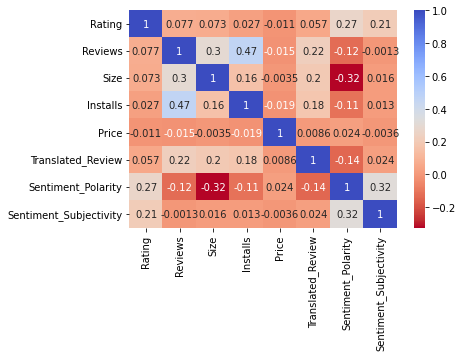

In [41]:
# Creating a Correlation map to find the relation between various terms given in the data tables
cor = playstore_with_review.corr()
sns.heatmap(cor, annot=True, cmap="coolwarm_r")